In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
def show_image(image_vec):
    plt.figure()
    plt.imshow(image_vec)
    plt.colorbar()
    plt.grid(False)
    plt.show()

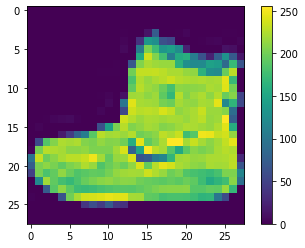

In [16]:
show_image(train_images[0])

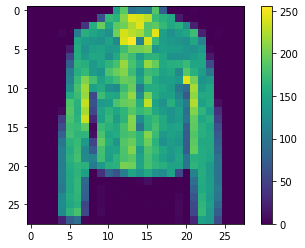

In [17]:
show_image(test_images[10])

In [18]:
train_images, test_images = train_images / 255.0, test_images / 255.0

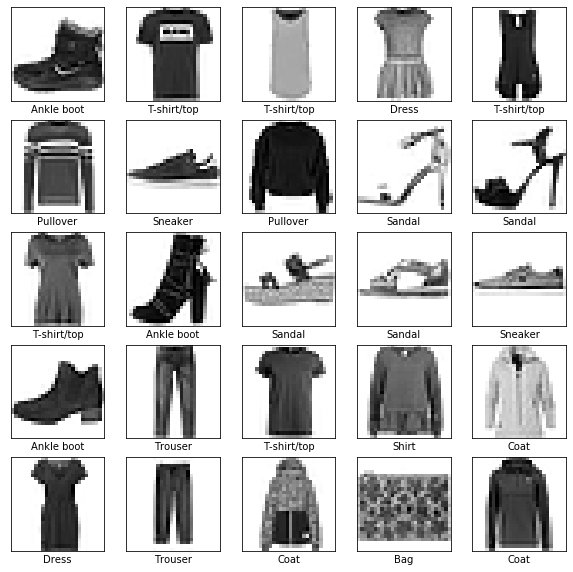

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
])

In [26]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [31]:
model.compile(
    optimizer='adam',
    loss= loss_fn,
    metrics=['accuracy']
)

In [32]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5012 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3790 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3396 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8914: 0s - loss: 0.2952  - ETA: 0s - loss: 0.2
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2787 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2576 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2460 - accuracy: 0.9077
Epoch 10/10
1875/1875 [=================

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
test_loss, test_acc

313/313 - 1s - loss: 0.3468 - accuracy: 0.8775 - 513ms/epoch - 2ms/step


(0.34681373834609985, 0.8774999976158142)

In [35]:
probility_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [38]:
#predictions = probility_model.predict(test_images)
predictions = probility_model(test_images)

In [40]:
predictions[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([4.2591253e-08, 9.3693518e-11, 1.6771990e-09, 3.1859485e-12,
       1.4219144e-09, 5.6862540e-04, 2.0902332e-08, 3.6681646e-03,
       2.8189731e-08, 9.9576306e-01], dtype=float32)>

In [41]:
np.argmax(predictions[0])

9

In [42]:
test_labels[0]

9

In [43]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

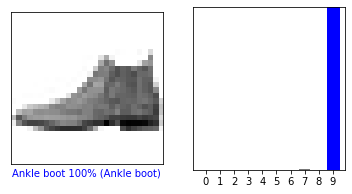

In [44]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

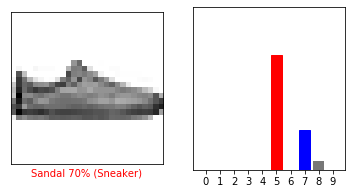

In [45]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

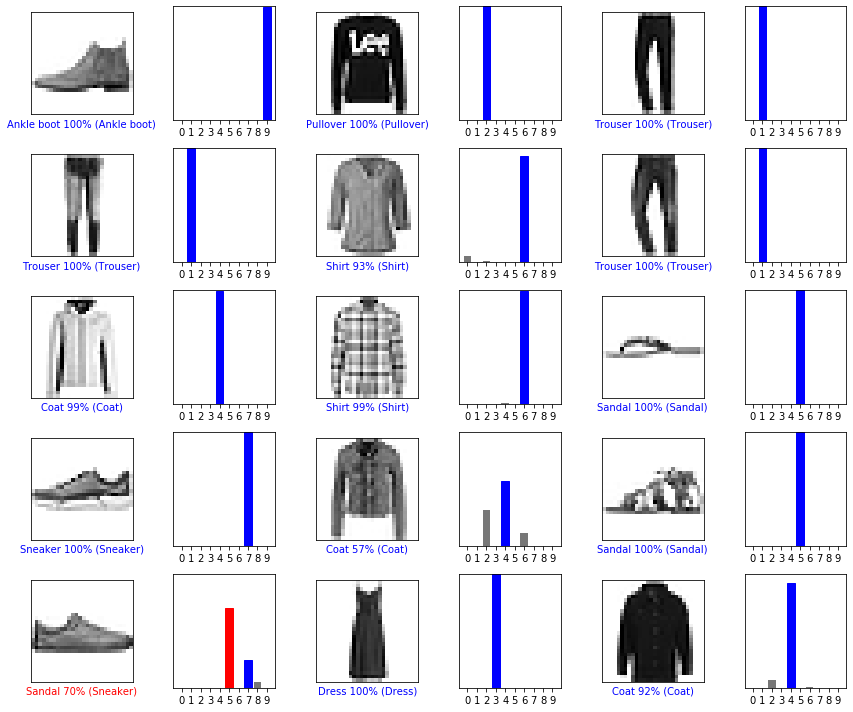

In [46]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()